In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import nbformat
import io

In [ ]:
# Load the dataset
data = pd.read_csv('dataset-covid19-trade-impact.csv')

In [ ]:
# Filter data for the years 2019, 2020, and 2021
data_filtered = data[data['Year'].isin([2019, 2020, 2021])]

In [ ]:
# Group by Year and Date and sum the cumulative values
grouped_data = data_filtered.groupby(['Year', 'Date'])['Cumulative'].mean().reset_index()

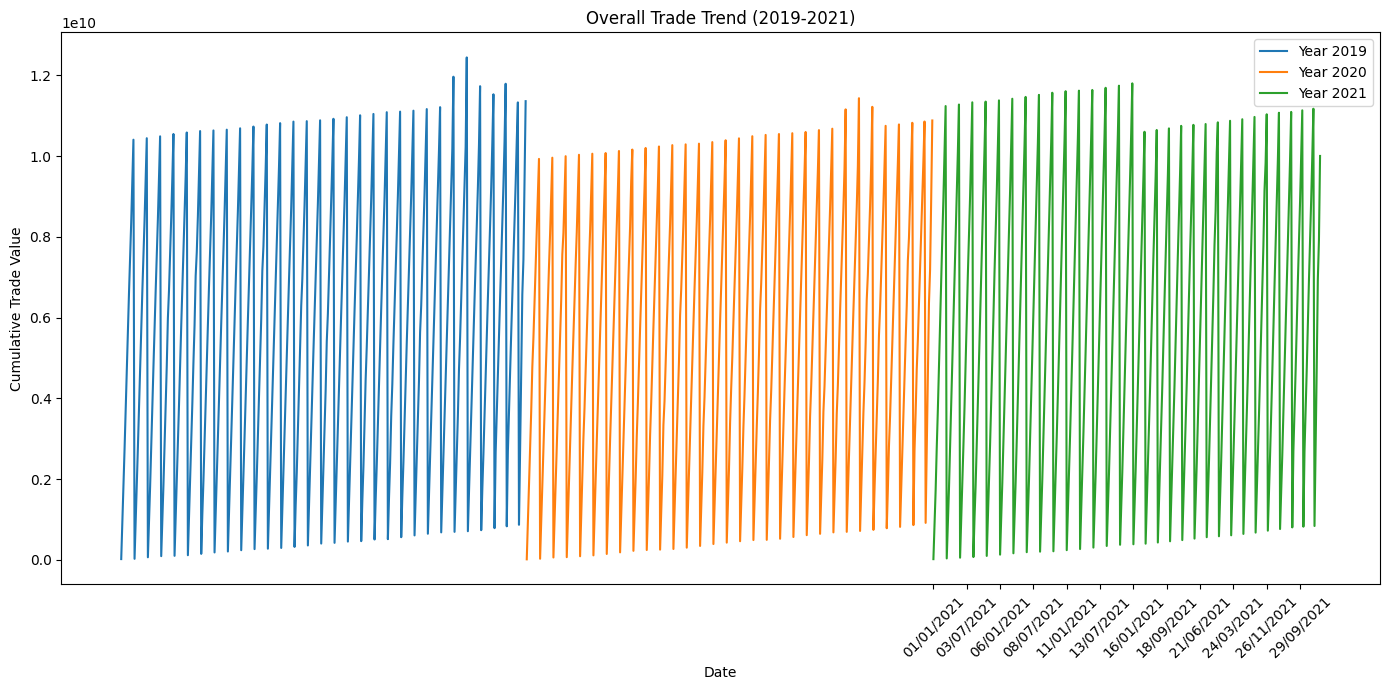

In [ ]:
# Plot Overall Trade Trend
plt.figure(figsize=(14, 7))
for year in [2019, 2020, 2021]:
    yearly_data = grouped_data[grouped_data['Year'] == year]
    plt.plot(yearly_data['Date'], yearly_data['Cumulative'], label=f'Year {year}')
plt.title('Overall Trade Trend (2019-2021)')
plt.xlabel('Date')
plt.ylabel('Cumulative Trade Value')
plt.xticks(yearly_data['Date'][::30], rotation=45)
plt.legend()
plt.tight_layout()

In [ ]:
# Group by Year, Direction, and Date and sum the cumulative values
grouped_direction = data_filtered.groupby(['Year', 'Date', 'Direction'])['Cumulative'].mean().reset_index()

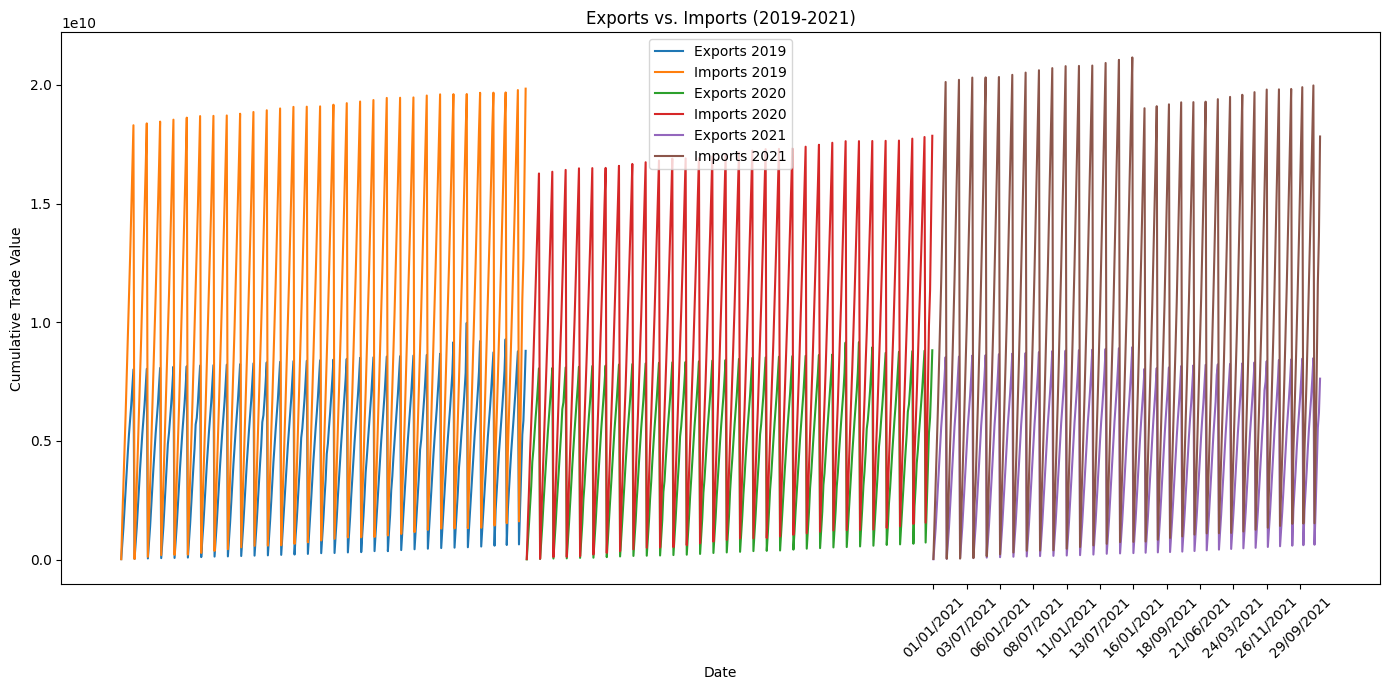

In [ ]:
# Plot Exports vs. Imports
plt.figure(figsize=(14, 7))
for year in [2019, 2020, 2021]:
    for direction in ['Exports', 'Imports']:
        subset_data = grouped_direction[(grouped_direction['Year'] == year) & (grouped_direction['Direction'] == direction)]
        plt.plot(subset_data['Date'], subset_data['Cumulative'], label=f'{direction} {year}')
plt.title('Exports vs. Imports (2019-2021)')
plt.xlabel('Date')
plt.ylabel('Cumulative Trade Value')
plt.xticks(subset_data['Date'][::30], rotation=45)
plt.legend()
plt.tight_layout()

In [ ]:
# Group by Year, Commodity and sum the cumulative values for the last date of each year
last_dates = data_filtered.groupby('Year')['Date'].max().values
commodity_data = data_filtered[data_filtered['Date'].isin(last_dates)].groupby(['Year', 'Commodity'])['Cumulative'].mean().reset_index()

In [ ]:
# Calculate change in trade value for each commodity between 2019-2020 and 2020-2021
commodity_data['Change_2019_2020'] = commodity_data.groupby('Commodity').apply(lambda x: x['Cumulative'].pct_change().fillna(0)).values
commodity_data['Change_2020_2021'] = commodity_data.groupby('Commodity').apply(lambda x: x['Cumulative'].pct_change().shift(-1).fillna(0)).values

In [ ]:
# Filter for commodities with the most significant changes
top_commodities_2019_2020 = commodity_data[commodity_data['Year'] == 2020].sort_values('Change_2019_2020', ascending=False).head(10)
top_commodities_2020_2021 = commodity_data[commodity_data['Year'] == 2021].sort_values('Change_2020_2021', ascending=False).head(10)

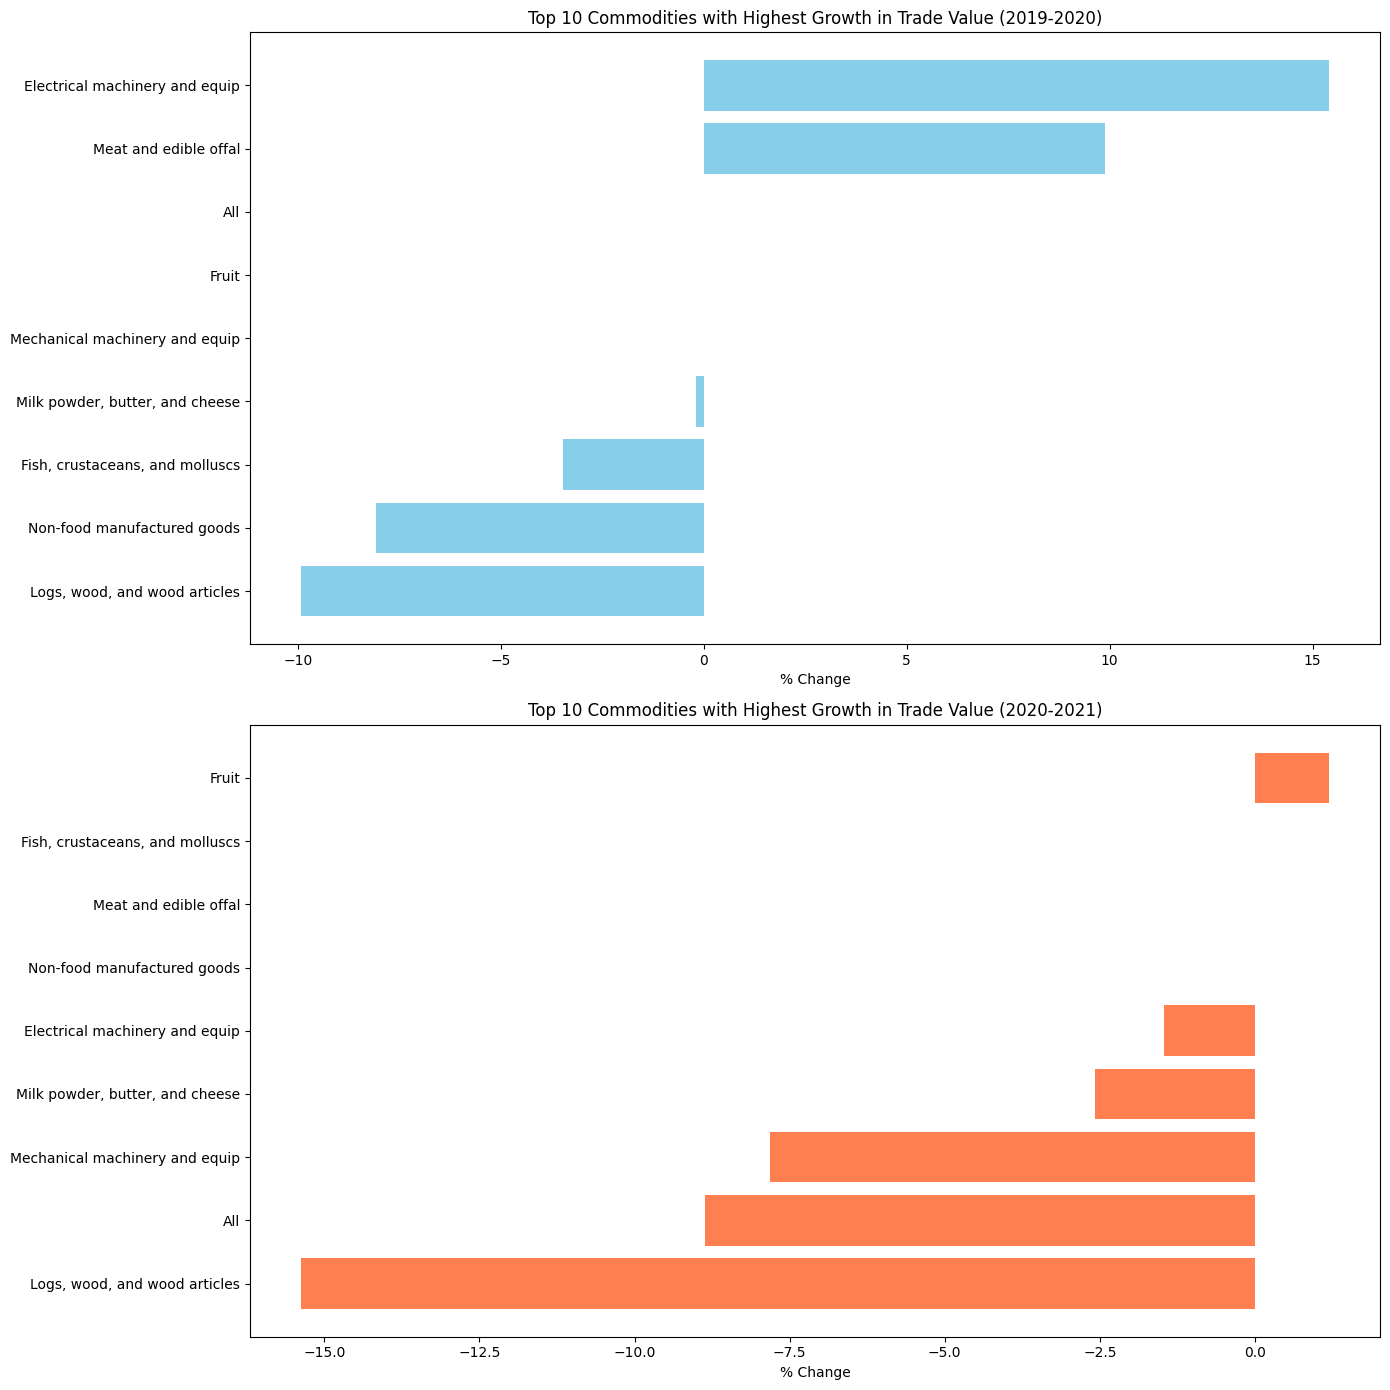

In [ ]:

# Plot Top Commodities Affected
fig, ax = plt.subplots(2, 1, figsize=(14, 14))
ax[0].barh(top_commodities_2019_2020['Commodity'], top_commodities_2019_2020['Change_2019_2020']*100, color='skyblue')
ax[0].set_title('Top 10 Commodities with Highest Growth in Trade Value (2019-2020)')
ax[0].set_xlabel('% Change')
ax[0].invert_yaxis()
ax[1].barh(top_commodities_2020_2021['Commodity'], top_commodities_2020_2021['Change_2020_2021']*100, color='coral')
ax[1].set_title('Top 10 Commodities with Highest Growth in Trade Value (2020-2021)')
ax[1].set_xlabel('% Change')
ax[1].invert_yaxis()
plt.tight_layout()

In [ ]:
# Group by Year, Transport_Mode and sum the cumulative values for the last date of each year
transport_data = data_filtered[data_filtered['Date'].isin(last_dates)].groupby(['Year', 'Transport_Mode'])['Cumulative'].mean().reset_index()


In [ ]:
# Calculate change in trade value for each transport mode between 2019-2020 and 2020-2021
transport_data['Change_2019_2020'] = transport_data.groupby('Transport_Mode').apply(lambda x: x['Cumulative'].pct_change().fillna(0)).values
transport_data['Change_2020_2021'] = transport_data.groupby('Transport_Mode').apply(lambda x: x['Cumulative'].pct_change().shift(-1).fillna(0)).values

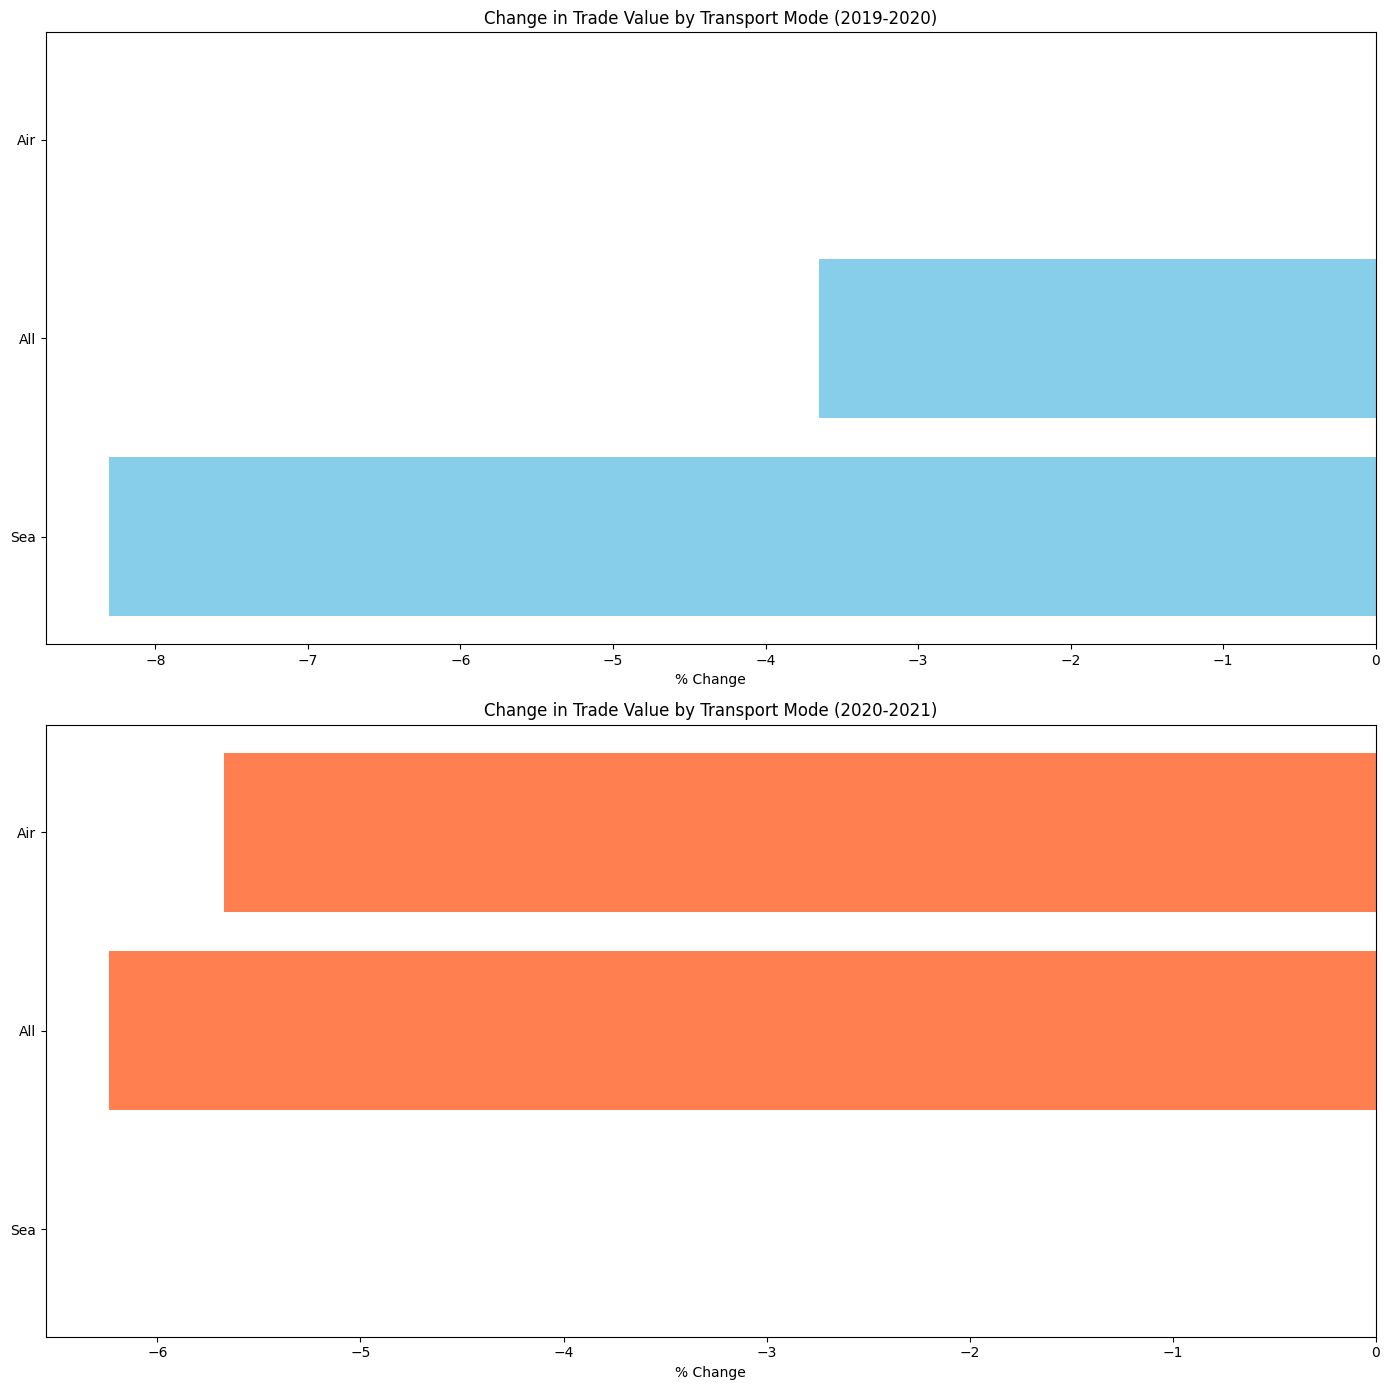

In [ ]:
# Plot Transport Mode Analysis
fig, ax = plt.subplots(2, 1, figsize=(14, 14))
ax[0].barh(transport_data[transport_data['Year'] == 2020]['Transport_Mode'], transport_data[transport_data['Year'] == 2020]['Change_2019_2020']*100, color='skyblue')
ax[0].set_title('Change in Trade Value by Transport Mode (2019-2020)')
ax[0].set_xlabel('% Change')
ax[0].invert_yaxis()
ax[1].barh(transport_data[transport_data['Year'] == 2021]['Transport_Mode'], transport_data[transport_data['Year'] == 2021]['Change_2020_2021']*100, color='coral')
ax[1].set_title('Change in Trade Value by Transport Mode (2020-2021)')
ax[1].set_xlabel('% Change')
ax[1].invert_yaxis()
plt.tight_layout()

In [ ]:
# Group by Year, Country and sum the cumulative values for the last date of each year
country_data = data_filtered[data_filtered['Date'].isin(last_dates) & (data_filtered['Country'] != 'All')].groupby(['Year', 'Country'])['Cumulative'].mean().reset_index()

In [ ]:
# Calculate change in trade value for each country between 2019-2020 and 2020-2021
country_data['Change_2019_2020'] = country_data.groupby('Country').apply(lambda x: x['Cumulative'].pct_change().fillna(0)).values
country_data['Change_2020_2021'] = country_data.groupby('Country').apply(lambda x: x['Cumulative'].pct_change().shift(-1).fillna(0)).values

In [ ]:
top_countries_2019_2020 = country_data[country_data['Year'] == 2020].sort_values('Change_2019_2020', ascending=False).head(10)

In [ ]:
top_countries_2020_2021 = country_data[country_data['Year'] == 2021].sort_values('Change_2020_2021', ascending=False).head(10)

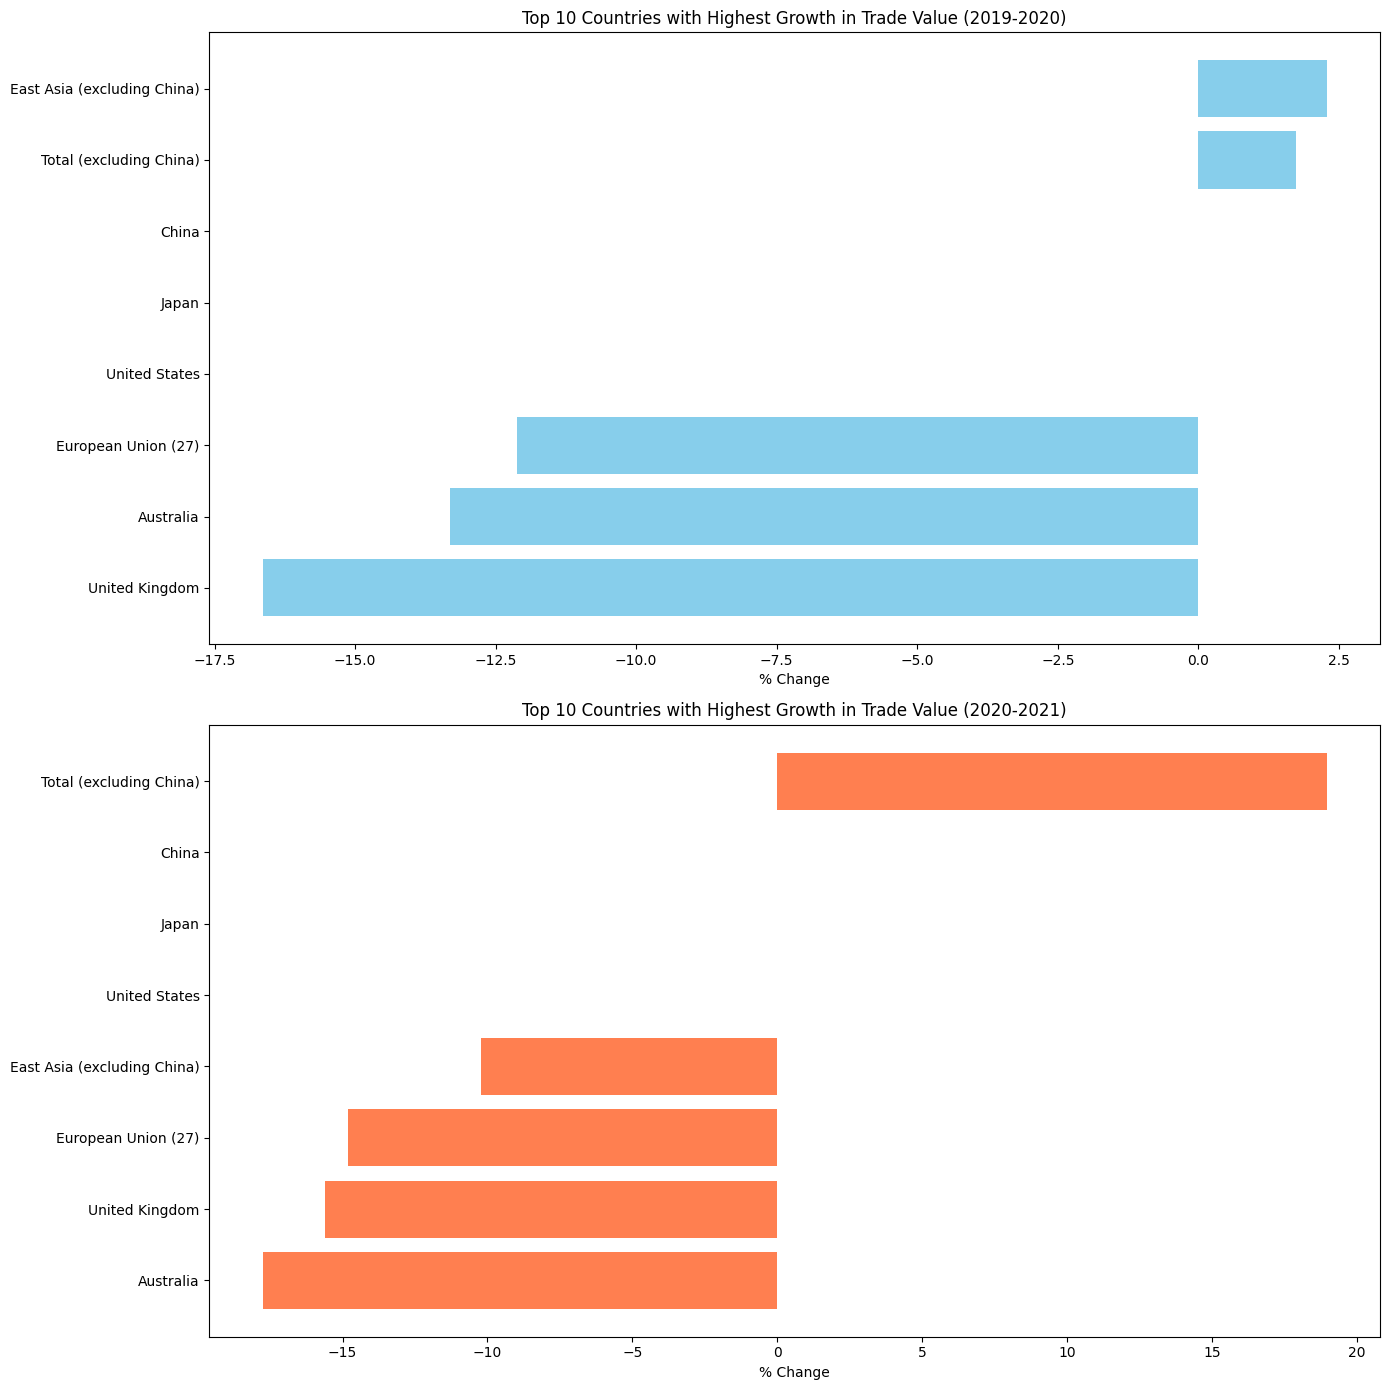

In [ ]:
#Plot Country Analysis
fig, ax = plt.subplots(2, 1, figsize=(14, 14))
ax[0].barh(top_countries_2019_2020['Country'], top_countries_2019_2020['Change_2019_2020']*100, color='skyblue')
ax[0].set_title('Top 10 Countries with Highest Growth in Trade Value (2019-2020)')
ax[0].set_xlabel('% Change')
ax[0].invert_yaxis()
ax[1].barh(top_countries_2020_2021['Country'], top_countries_2020_2021['Change_2020_2021']*100, color='coral')
ax[1].set_title('Top 10 Countries with Highest Growth in Trade Value (2020-2021)')
ax[1].set_xlabel('% Change')
ax[1].invert_yaxis()
plt.tight_layout()

In [ ]:
#Select relevant features for clustering
cluster_features = [ 'Year','Cumulative','Value']

In [ ]:
cluster_data = data_filtered[cluster_features]

In [ ]:
#Initialize KMeans with desired number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

In [ ]:
kmeans.fit(cluster_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
#Add cluster labels to original data
data_filtered['Cluster'] = kmeans.labels_

<ipython-input-122-62249c89006d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Cluster'] = kmeans.labels_


In [ ]:
#Analyze cluster
cluster_analysis = data_filtered.groupby('Cluster').mean()

<ipython-input-123-9e8da7808643>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = data_filtered.groupby('Cluster').mean()


Text(0.5, 1.0, 'Cluster Analysis')

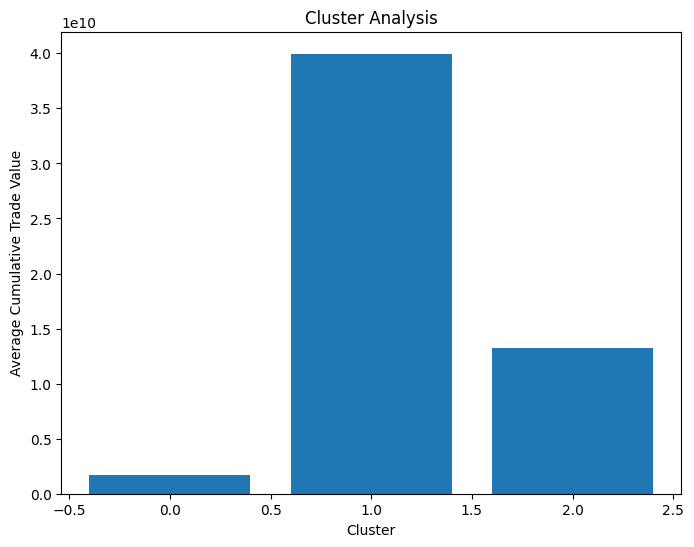

In [ ]:
#Plot Cluster Analysis
plt.figure(figsize=(8, 6))
plt.bar(cluster_analysis.index, cluster_analysis['Cumulative'])
plt.xlabel('Cluster')
plt.ylabel('Average Cumulative Trade Value')
plt.title('Cluster Analysis')

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=42)

In [ ]:
# Fit GMM model to data
gmm.fit(cluster_data)

GaussianMixture(n_components=3, random_state=42)

In [ ]:
# Add cluster labels to original data
data_filtered['GMM_Cluster'] = gmm.predict(cluster_data)

<ipython-input-127-6b667c9112fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['GMM_Cluster'] = gmm.predict(cluster_data)


In [ ]:
gmm_cluster_analysis = data_filtered.groupby('GMM_Cluster').mean()

<ipython-input-128-a5571d68a769>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gmm_cluster_analysis = data_filtered.groupby('GMM_Cluster').mean()


Text(0.5, 1.0, 'GMM Cluster Analysis')

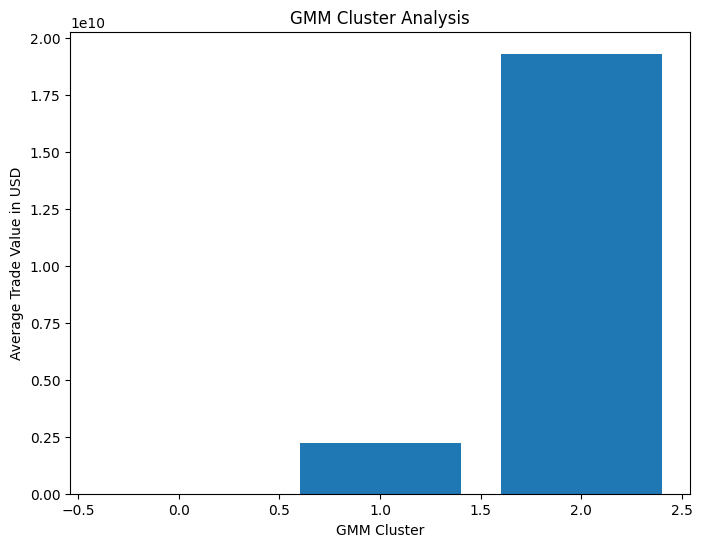

In [ ]:
# Plot GMM Cluster Analysis
plt.figure(figsize=(8, 6))
plt.bar(gmm_cluster_analysis.index, gmm_cluster_analysis['Cumulative'])
plt.xlabel('GMM Cluster')
plt.ylabel('Average Trade Value in USD')
plt.title('GMM Cluster Analysis')

In [ ]:
!git clone https://github.com/niyathnair/K-means-GMMCovid19_Analysis.git

fatal: destination path 'K-means-GMMCovid19_Analysis' already exists and is not an empty directory.
